In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import warnings
import math

from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from math import sqrt
from scipy.spatial import distance

warnings.filterwarnings('ignore')

usage=pd.read_csv("TechUsage.csv",sep=",")
usage

,Id,User,Name,Language,value
0,376543369,Navoxya,AF-final,JavaScript,694
1,376543369,Navoxya,AF-final,Python,1500
2,376543369,Navoxya,AF-final,PHP,2100
3,382661686,Navoxya,api-ICAF,JavaScript,6500
4,382661686,Navoxya,api-ICAF,CSS,500
5,382661686,Navoxya,api-ICAF,HTML,300
6,357484049,Navoxya,MAD-Project,Flutter,5500
7,357484049,Navoxya,MAD-Project,Java,600
8,358692152,Navoxya,Number-Converter,JavaScript,800
9,358692152,Navoxya,Number-Converter,HTML,1500


In [2]:
def multiply_s1(x):
    return x * 100.00



df = pd.DataFrame(usage.groupby('Language')['value'].sum().nlargest(10))
total = df['value'].sum()
print(total)
df['percentage'] = df['value']/total
df.reset_index(level=0, inplace=True)
df['percentage'] = df['percentage'].apply(multiply_s1).round(3)
df['percentagePoints'] = (df['percentage']/100).round(4)
df

19994


,Language,value,percentage,percentagePoints
0,JavaScript,7994,39.982,0.3998
1,Flutter,5500,27.508,0.2751
2,PHP,2100,10.503,0.1050
3,HTML,1800,9.003,0.0900
4,Python,1500,7.502,0.0750
5,Java,600,3.001,0.0300
6,CSS,500,2.501,0.0250


In [4]:
allRepo = pd.DataFrame(usage.groupby('Name'))
index = allRepo.index
number_of_repos = len(index)
print(number_of_repos)
rep_point = number_of_repos//10
print("Repos point: {}".format(rep_point))

4
Repos point: 0


In [5]:
df['Newpercentage'] = df['percentagePoints']+rep_point
df


,Language,value,percentage,percentagePoints,Newpercentage
0,JavaScript,7994,39.982,0.3998,0.3998
1,Flutter,5500,27.508,0.2751,0.2751
2,PHP,2100,10.503,0.1050,0.1050
3,HTML,1800,9.003,0.0900,0.0900
4,Python,1500,7.502,0.0750,0.0750
5,Java,600,3.001,0.0300,0.0300
6,CSS,500,2.501,0.0250,0.0250


In [6]:
# condition_one = df["Language"] == "JavaScript"

# condition_two = df["Language"] == "HTML"

# new_dataframe = df[condition_one & condition_two]

# new_dataframe

mask1 = (df['Language'].isin(['JavaScript']))
mask2 = (df['Language'].isin(['Flutter']))
mask3 = (df['Language'].isin(['HTML']))
mask4 = (df['Language'].isin(['CSS']))

filteredL = df[mask1 | mask2 | mask3 | mask4]
filteredL


,Language,value,percentage,percentagePoints,Newpercentage
0,JavaScript,7994,39.982,0.3998,0.3998
1,Flutter,5500,27.508,0.2751,0.2751
3,HTML,1800,9.003,0.0900,0.0900
6,CSS,500,2.501,0.0250,0.0250


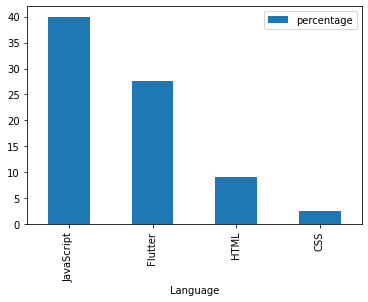

In [7]:
filteredL.plot(
    x = 'Language',
    y = 'percentage',
    kind = 'bar')
plt.show()